# COVID -19 BIG_DATA_SET

In [2]:
import pandas as pd
data= pd.read_csv(r"C:\Users\Hariprasad\Downloads\file.csv")
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [3]:
data.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [4]:
data.isnull().sum()             #this will show the total null values in each column individually

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [5]:
#Import seaborn library and matplotlib library as sns and plt...

import seaborn as sns
import matplotlib.pyplot as plt

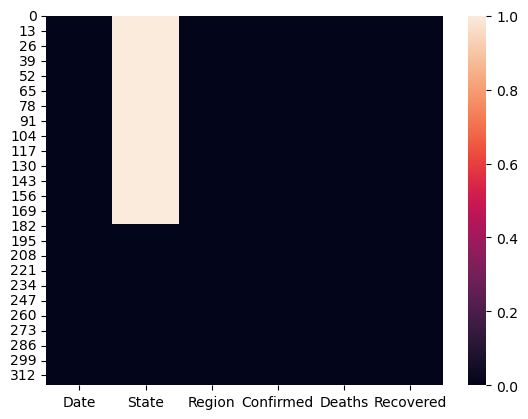

In [6]:
sns.heatmap(data.isnull())
plt.show()

|QUERY: 1 |Output showing the number of confirmend deaths and recovered cases region-wise in each State...||

In [7]:
data.groupby('Region')['Confirmed'].sum().sort_values(ascending=False)

Region
US                       1039909
Spain                     236899
Italy                     203591
France                    166543
UK                        166441
                          ...   
Sao Tome and Principe          8
Papua New Guinea               8
Bhutan                         7
Western Sahara                 6
Yemen                          6
Name: Confirmed, Length: 187, dtype: int64

In [8]:
data.groupby('Region')[['Confirmed', 'Recovered']].sum()

,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


|QUERY: 2 |Filter out the cases where the "confirmed cases" is less than "10"...||

In [9]:
data=data[~(data.Confirmed < 10)]
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


|QUERY: 3 |Depict the "Region" (atleast to 50) where maximum "Confirmed cases" were recorded||

In [10]:
data.groupby('Region').Confirmed.sum().sort_values(ascending= False).head(50)

Region
US                      1039909
Spain                    236899
Italy                    203591
France                   166536
UK                       166432
Germany                  161539
Turkey                   117589
Russia                    99399
Iran                      93657
Mainland China            82861
Brazil                    79685
Canada                    52860
Belgium                   47859
Netherlands               38993
Peru                      33931
India                     33062
Switzerland               29407
Ecuador                   24675
Portugal                  24505
Saudi Arabia              21402
Sweden                    20302
Ireland                   20253
Mexico                    17799
Israel                    15834
Singapore                 15641
Pakistan                  15525
Austria                   15402
Chile                     14885
Japan                     13895
Belarus                   13181
Poland                    12640
Q

|QUERY: 4 |...Publish the "Region" minimum number of "deaths" ()recorded....||

In [11]:
data.groupby('Region').Deaths.sum().sort_values(ascending= True).head(50)

Region
Cambodia                            0
Seychelles                          0
Saint Lucia                         0
Central African Republic            0
Saint Kitts and Nevis               0
South Sudan                         0
Rwanda                              0
Grenada                             0
Macau                               0
Madagascar                          0
Nepal                               0
Namibia                             0
Saint Vincent and the Grenadines    0
Mozambique                          0
Holy See                            0
Timor-Leste                         0
Mongolia                            0
Uganda                              0
Laos                                0
Eritrea                             0
Vietnam                             0
Fiji                                0
Dominica                            0
Gambia                              1
Equatorial Guinea                   1
Eswatini                            1
Cabo 

|QUERY: 5 |Address the "Confirmed", "Deaths", "Recovered" cases were reported from India till 29 April 2020||

In [12]:
data[data.Region=="India"]

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


|QUERY: 6 |wrt number of "Confirmed cases"...sort the data in ascending order||

In [13]:
data.sort_values(by=["Confirmed"], ascending = True).head()

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11


|QUERY: 7 |wrt "Recovered cases"....Sort the data in descending order||

In [14]:
data.sort_values(by= ["Recovered"], ascending= False).head()

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616


|QUERY: 8 |...Gather up the "Region" corresponding to "Confirmed","Deaths","Recovered"..||

In [15]:
grouped_by_region = data.groupby('Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

grouped_by_region.head()

,Region,Confirmed,Deaths,Recovered
0,Afghanistan,1939,60,252
1,Albania,766,30,455
2,Algeria,3848,444,1702
3,Andorra,743,42,423
4,Angola,27,2,7


|QUERY: 9 |Combine the data wrt to date , sum up the outcomes||

In [16]:
data['Date'] = pd.to_datetime(data['Date'])
trend_by_date = data.groupby('Date').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()
trend_by_date.head()

C:\Users\Hariprasad\AppData\Local\Temp\ipykernel_13432\2699462882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


,Date,Confirmed,Deaths,Recovered
0,2020-04-29,3193807,227633,831638


|QUERY: 10 |Plot "Confirmed cases bars" vs corresponding "Deaths" wrt to particular region as listed||

['Belgium', 'Brazil', 'Canada','France', 'Germany', 'India', 'Russia', 'Iran', 'Italy', 'US', 'Spain', 'UK']

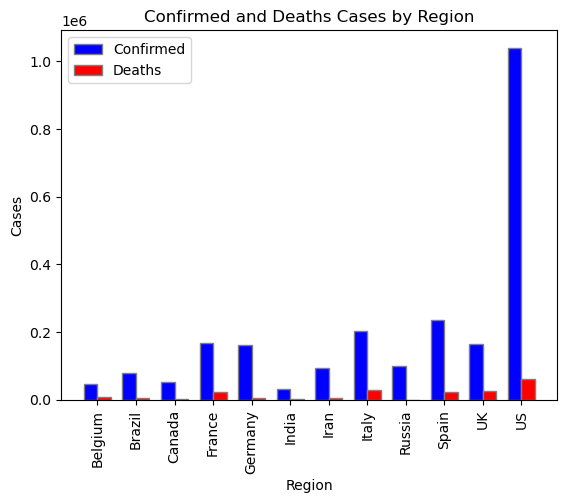

In [8]:
import matplotlib.pyplot as plt
# Filter specific regions
regions_of_interest = ['Belgium', 'Brazil', 'Canada', 'France', 'Germany',
                       'India','Russia', 'Iran', 'Italy', 'US', 'Spain', 'UK']
filtered_data = data[data['Region'].isin(regions_of_interest)]

# Group the filtered data by Region and aggregate sums for Confirmed and Deaths
filtered_region_data = filtered_data.groupby('Region')[['Confirmed', 'Deaths']].sum().reset_index()

import numpy as np

# Define bar width and positions
bar_width = 0.35
r1 = np.arange(len(filtered_region_data['Region']))
r2 = [x + bar_width for x in r1]

plt.figure()
plt.bar(r1, filtered_region_data['Confirmed'], color='blue', width=bar_width, edgecolor='grey', label='Confirmed')
plt.bar(r2, filtered_region_data['Deaths'], color='red', width=bar_width, edgecolor='grey', label='Deaths')

plt.xlabel('Region')
plt.ylabel('Cases')
plt.title('Confirmed and Deaths Cases by Region')
plt.xticks([r + bar_width/2 for r in range(len(filtered_region_data['Region']))], filtered_region_data['Region'], rotation=90)
plt.legend()

plt.show()


|QUERY: 11 |Percentage distribution bar plot for only one single "Region" i.e. "India" ||


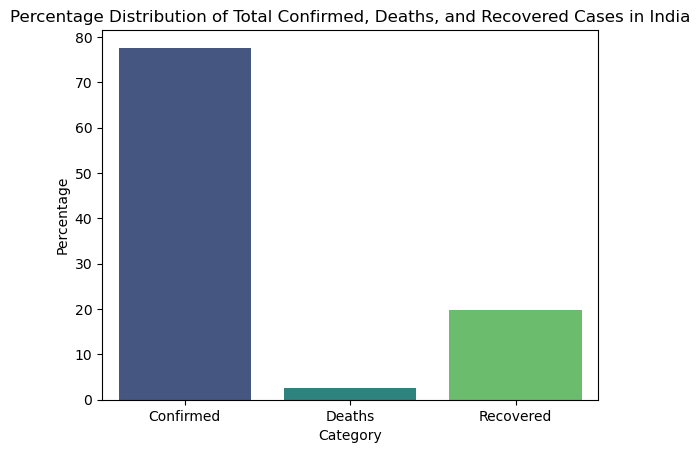

In [5]:
import seaborn as sns

# Filter the data for only single region India
india_data = data[data['Region'] == 'India'][['Confirmed', 'Deaths', 'Recovered']].sum()

india_total = india_data.sum()
india_percentage = (india_data / india_total) * 100

india_percentage_df = india_percentage.reset_index()
india_percentage_df.columns = ['Category', 'Percentage']

plt.figure()
sns.barplot(x='Category', y='Percentage', data=india_percentage_df, palette='viridis')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Total Confirmed, Deaths, and Recovered Cases in India')

plt.show()

|QUERY: 13 |Address the "Confirmed", "Deaths", "Recovered" cases were reported from "Rusia" till 29 April 2020||


In [10]:
data[data.Region=="Russia"]

,Date,State,Region,Confirmed,Deaths,Recovered
134,4/29/2020,NaN,Russia,99399,972,10286


|QUERY: 14 |Percentage distribution bar plot comapring "India" vs "Russia" ||

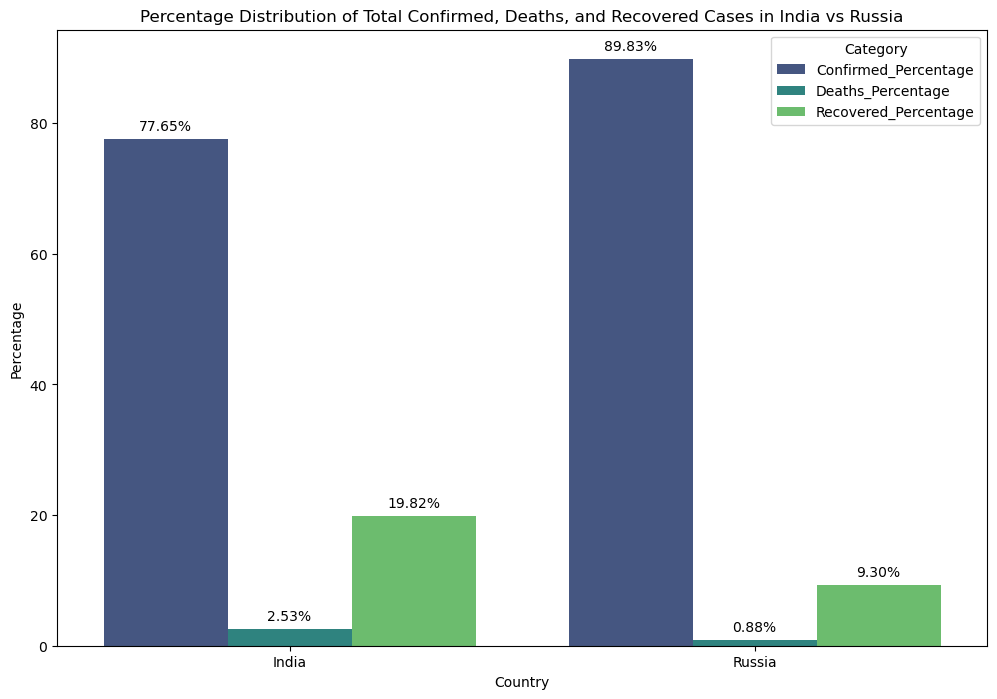

In [7]:

# Filter data as per 2 Region ie. "India" and "Russia"
countries_of_interest = ['India', 'Russia']
filtered_data = data[data['Region'].isin(countries_of_interest)]

# Grouping filtered data by Region and aggregate sums for Confirmed, Deaths, and Recovered cases.
grouped_data = filtered_data.groupby('Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Calculate the percentage.
grouped_data['Total'] = grouped_data['Confirmed'] + grouped_data['Deaths'] + grouped_data['Recovered']
grouped_data['Confirmed_Percentage'] = (grouped_data['Confirmed'] / grouped_data['Total']) * 100
grouped_data['Deaths_Percentage'] = (grouped_data['Deaths'] / grouped_data['Total']) * 100
grouped_data['Recovered_Percentage'] = (grouped_data['Recovered'] / grouped_data['Total']) * 100

plot_data = grouped_data.melt(id_vars='Region', 
                              value_vars=['Confirmed_Percentage', 'Deaths_Percentage', 'Recovered_Percentage'],
                              var_name='Category', value_name='Percentage')

# "%" distribution plot.
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Region', y='Percentage', hue='Category', data=plot_data, palette='viridis')

plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Total Confirmed, Deaths, and Recovered Cases in India vs Russia')
plt.legend(title='Category', loc='upper right')

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f') + '%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.show()